Proyecto Unidad 1

Estadistica Inferencial 

Luis Fernando Alemán López

Marco Teórico

La relación entre la experiencia laboral y el salario ha sido ampliamente estudiada en economía y estadística, debido a su impacto en la toma de decisiones en recursos humanos y desarrollo profesional. En este contexto, se pueden analizar estos factores mediante herramientas de estadística inferencial, como la correlación de Pearson y la regresión lineal.

Correlación de Pearson: Es una medida estadística que cuantifica la fuerza y dirección de la relación lineal entre dos variables numéricas. Su coeficiente (r) varía entre -1 y 1, donde valores cercanos a 1 indican una fuerte relación positiva, valores cercanos a -1 indican una fuerte relación negativa, y valores cercanos a 0 sugieren una relación débil o inexistente.

Coeficiente de determinación (R²): Representa el porcentaje de variabilidad en la variable dependiente (salario) que puede explicarse mediante la variable independiente (experiencia). Valores altos de R² indican un buen ajuste del modelo a los datos.

Regresión Lineal Simple: Es un modelo matemático que busca predecir el valor de una variable dependiente (Y: salario) en función de una variable independiente (X: años de experiencia). Se expresa como:

Donde  es la intersección (salario base),  es la pendiente (efecto de la experiencia sobre el salario) y  es el término de error.


Hipótesis

Hipótesis Nula (H₀): No existe una relación significativa entre los años de experiencia y el salario.

Hipótesis Alternativa (H₁): Existe una relación significativa entre los años de experiencia y el salario, de manera que un mayor número de años de experiencia conduce a un salario más alto.



Coeficiente de correlación:  0.9782

Coeficiente de determinación:  0.9570

Coeficiente de determinación:  0.9570

Intervalo de confianza para b1 de  95%
 8674.1187 < b1 <  10225.8059

valor-p de Shapiro:  0.1952

valor_p de Breusch-Pagan:  0.5276



,df,sum_sq,mean_sq,F,PR(>F)
YearsExperience,1.0,2.085685e+10,2.085685e+10,622.507203,1.143068e-20
Residual,28.0,9.381286e+08,3.350459e+07,NaN,NaN


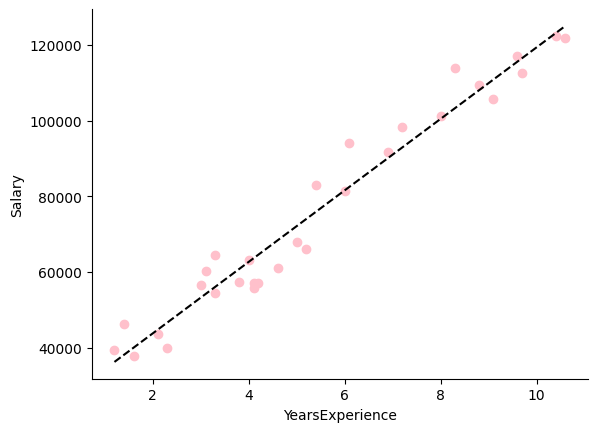

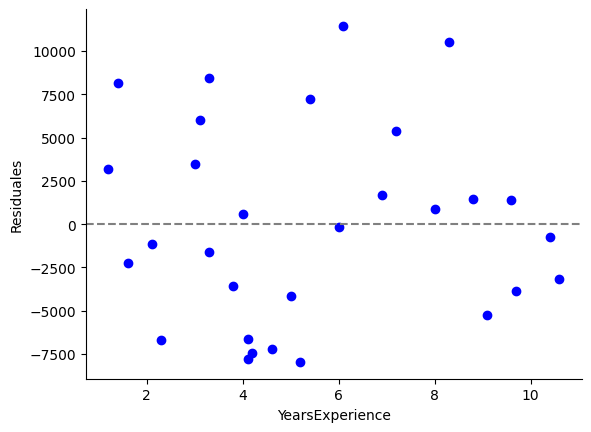

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/Aleman2202/Estadistica-Inferenical-II/refs/heads/main/Salary_dataset.csv")
df.dropna(inplace = True)

X= df["YearsExperience"]
Y= df["Salary"]


plt.scatter(X, Y, color = 'pink')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
print(f'Coeficiente de determinación: {r ** 2: 0.4f}\n')


# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

Yc = fun(X)

plt.plot(X, Yc, color = 'black', linestyle = '--')

from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')


# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'blue')
plt.xlabel('YearsExperience')
plt.ylabel('Residuales')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'gray', linestyle = '--')

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')


# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')



# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('Salary ~ YearsExperience', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova




Coeficiente de Correlación (r = 0.9782)

Este valor indica una fuerte correlación positiva entre los años de experiencia y el salario.
Como está muy cerca de 1, sugiere que a medida que aumentan los años de experiencia, el salario también tiende a aumentar de manera proporcional.

Coeficiente de Determinación (R² = 0.9570)

Significa que el 95.7% de la variabilidad en los salarios puede explicarse por los años de experiencia.
Esto indica un muy buen ajuste del modelo de regresión, lo que sugiere que la experiencia laboral es un factor clave en la determinación del salario.

Intervalo de confianza para b1 de  95%

El coeficiente de regresión 

𝑏1(pendiente) está entre 8,674.12 y 10,225.81.

Esto significa que, con un 95% de confianza, se espera que por cada año adicional de experiencia, el salario aumente entre estos valores.

Como el intervalo es positivo y relativamente estrecho, confirma que la relación entre experiencia y salario es consistente y significativa.
Prueba de Normalidad de Shapiro-Wilk (p-valor = 0.1952)

La hipótesis nula de esta prueba establece que los residuos siguen una distribución normal.
Dado que el p-valor es mayor a 0.05, no se rechaza la normalidad, lo que sugiere que los errores del modelo están distribuidos de manera normal, cumpliendo un supuesto clave de la regresión lineal.
Prueba de Heterocedasticidad de Breusch-Pagan (p-valor = 0.5276)

Evalúa si los errores del modelo tienen varianza constante (homocedasticidad).
Como el p-valor es mayor a 0.05, no hay evidencia de heterocedasticidad, lo que significa que la varianza de los errores es homogénea y el modelo es adecuado.


Conclusión
Los resultados sugieren que existe una relación muy fuerte y significativa entre la experiencia y el salario. El modelo de regresión lineal es estadísticamente válido, ya que cumple con los supuestos clave de normalidad y homocedasticidad. Además, el coeficiente de determinación alto indica que la experiencia laboral es un predictor confiable del salario.